<a href="https://colab.research.google.com/github/Dila1998/Gold-Price-Prediction-model/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

###data collection and preprocessing

In [4]:
# loading csv to pandas data frame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [5]:
#print 1st 5rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
#print last 5rows of the data frame
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
#no of rows and cols
gold_data.shape

(2290, 6)

In [8]:
#getting some basic information of data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
#checking no of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [10]:
#getting statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


#corrilation

positive corr

negative corr

In [13]:
correlation = gold_data.corr(numeric_only=True)

<Axes: >

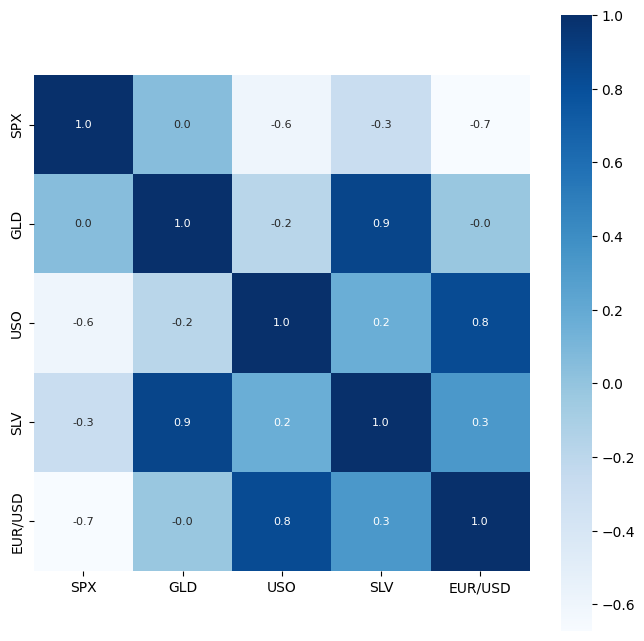

In [14]:
#constructing a heat map to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [15]:
#corr values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


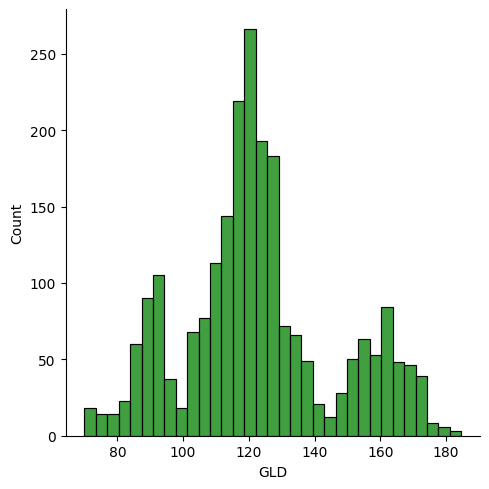

In [16]:
#check the distribution of the gold price
sns.displot(gold_data['GLD'], color='green')

#splitting features and target

In [17]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [18]:
print (X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [19]:
print (Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


##splitting into training data and testing data

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

###model training randomforest

In [21]:
regressor = RandomForestRegressor(n_estimators=100)

In [22]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

#model evaluation

In [23]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [24]:
print (test_data_prediction)

[168.6052997   82.15629993 116.01610059 127.66640085 120.90640143
 154.50199832 150.08059896 126.14620046 117.51659882 126.02110068
 116.72540103 171.29750124 142.10769899 167.78819866 115.15830004
 117.60400028 140.41170229 170.25290078 159.1714031  159.43029929
 155.12960094 125.3132     175.75599927 157.38460315 125.17910059
  93.71649964  77.05850043 120.48049979 119.02649951 167.41219973
  88.21960052 125.49880023  90.90700034 117.66780027 121.06849885
 136.54560125 115.46010099 115.24200075 148.51360005 107.44260115
 104.45370263  87.37989794 126.51740044 117.94750038 154.8786992
 119.46740017 108.58399964 108.26529816  93.19940041 127.1301978
  74.7774006  113.6489989  121.16220012 111.24179903 118.77489888
 120.80939922 159.1890991  166.77340146 147.11209748  86.02839874
  94.37660038  86.83469892  90.32589985 118.77860075 126.42560051
 127.4456003  170.17880001 122.33189935 117.38079933  98.11040035
 168.94140217 142.93399804 132.60750212 121.19490238 121.37149941
 119.4809008

In [25]:
#R squerd error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9898293416200555


###compare the actual values and predicted values

In [26]:
Y_test = list(Y_test)

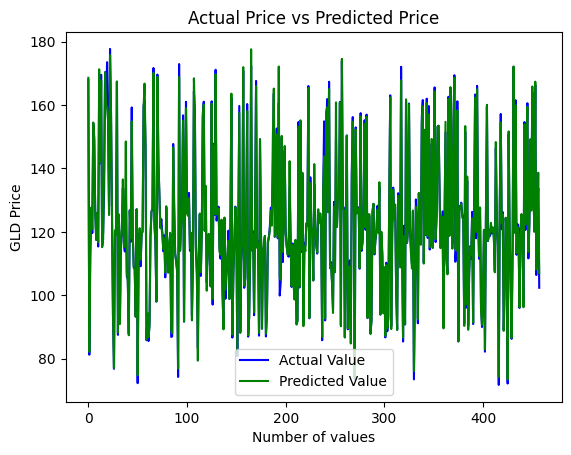

In [30]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()